# Mathematische Modelle zur Beschreibung von Daten

Wir haben letzte Woche einen Datensatz von handgeschriebenen Ziffern eingelesen. Diese waren im csv-Format gespeichert. Wir haben die handgeschriebenen Ziffern visualisiert und eine Reihe an Statistiken auf den Daten berechnet. 

In einem anderen Notebook, haben wir uns Wahrscheinlichkeitsverteilungen angeschaut. Wir haben zu den Wahrscheinlichkeitsverteilungen Zufallszahlen generiert und diese zusammen mit den Wahrscheinlichkeitsdichtefunktionen visualisiert.

Anhand eines weiteren Datensatzes (https://datahub.io/core/global-temp#data) wollen wir nun die zwei Welten zusammenbringen und ein neues Datenformat (JSON) kennenlernen. Wir wollen diese Daten einlesen und anhand von mathematischen Modellfunktionen beschreiben. Bei dem Datensatz handelt es sich um die monatlichen Temperaturmittelwerte für die gesammte Erde.

---

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt

In [2]:
f = open("../data/temperature/monthly_json.json", "r") # öffnet die Datei
file_content = f.read(500) # liest die ersten 100 Zeichen der Datei

In [3]:
file_content

'[{"Date": "2016-12-06", "Mean": 0.7895, "Source": "GCAG"},{"Date": "2016-12-06", "Mean": 0.81, "Source": "GISTEMP"},{"Date": "2016-11-06", "Mean": 0.7504, "Source": "GCAG"},{"Date": "2016-11-06", "Mean": 0.93, "Source": "GISTEMP"},{"Date": "2016-10-06", "Mean": 0.7292, "Source": "GCAG"},{"Date": "2016-10-06", "Mean": 0.89, "Source": "GISTEMP"},{"Date": "2016-09-06", "Mean": 0.8767, "Source": "GCAG"},{"Date": "2016-09-06", "Mean": 0.87, "Source": "GISTEMP"},{"Date": "2016-08-06", "Mean": 0.8998, '

Wie wir sehen, handelt es sich immernoch um eine Textdatei. Diese ist jedoch in einem grundsätzlich anderen Format aufgebaut. Jedoch gibt es auch hier bereits fertige Interpreter in pandas:

In [4]:
data = pd.read_json("../data/temperature/monthly_json.json") 

In [5]:
data.head()

,Date,Mean,Source
0,2016-12-06,0.7895,GCAG
1,2016-12-06,0.8100,GISTEMP
2,2016-11-06,0.7504,GCAG
3,2016-11-06,0.9300,GISTEMP
4,2016-10-06,0.7292,GCAG


Zunächst will ich die Daten etwas umformatieren, so dass das Datum zum index des Dataframes wird und die verschiedenen Quellen (Source) als Spalten dargestellt werden. Dazu nutze ich die Pivot-Funktion von pandas:

In [6]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [7]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


Wie ich aus der Beschreibung der Daten weiß, handelt es sich um einen zeitlichen Verlauf der Temperaturmittelwerte. Diesen will ich zunächst einmal visualisieren um ein gefühl dafür zu bekommen.

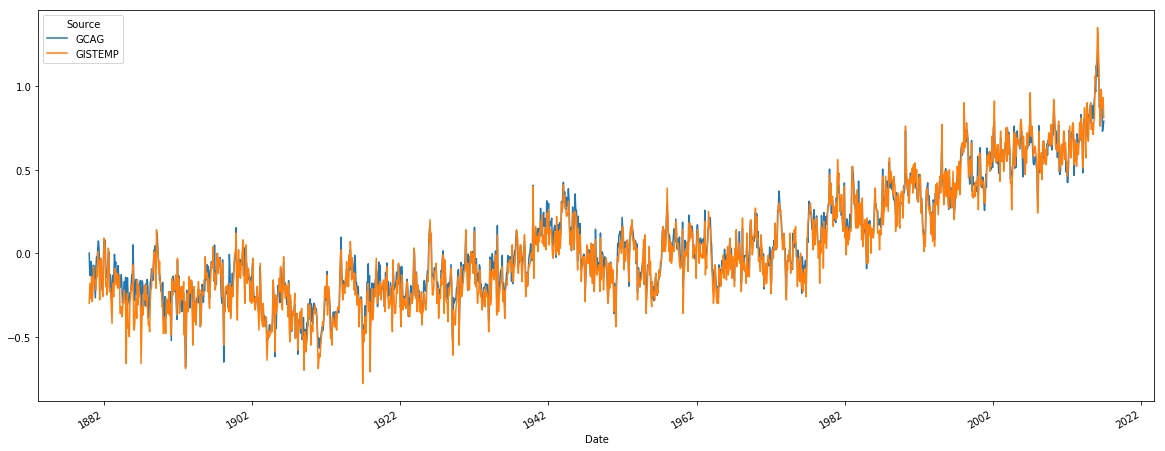

In [8]:
pivot_df.plot(figsize=(20, 8),);

Zuletzt bei den Verteilungen haben wir selbst generierte Daten in Zusammenhang mit ihren Wahrscheinlichkeitsdichtefunktionien gebracht. Nun versuche ich dasselbe mit den Temperaturdaten zu denen ich die Verteilung nicht kenne. Dazu visualisiere ich erstmal die Wertebereiche für 'GCAG' und 'GISTEMP' mit Hilfe eines normierten Histogramms.

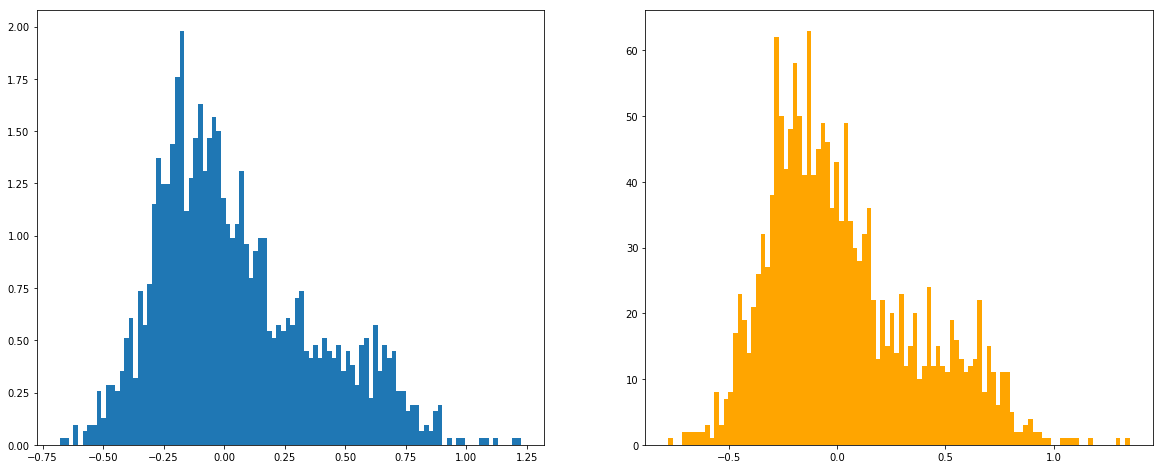

In [9]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, color='orange')

plt.show()

Und lasse mir ein paar Statistiken dazu ausgeben

In [10]:
pivot_df.describe()

Source,GCAG,GISTEMP
count,1644.000000,1644.000000
mean,0.048797,0.024380
std,0.326230,0.343709
min,-0.679600,-0.780000
25%,-0.190625,-0.230000
50%,-0.021650,-0.050000
75%,0.252150,0.230000
max,1.224500,1.350000


Auch wenn die Daten nicht ganz normalverteilt aussehen, will ich diese Wahrscheinlichkeitsdichtefunktion über die Werte plotten. Dazu nehme ich die Mittelwert und Standardabweichung aus dem describe() Ergebnis.

In [11]:
loc_gcag = 0.048797
scale_gcag = 0.326230
lower = scipy.stats.norm.ppf(0.01,loc_gcag,scale_gcag)
upper = scipy.stats.norm.ppf(0.99,loc_gcag,scale_gcag)
x_gcag = scipy.linspace(lower,upper,100)

y_gcag = scipy.stats.norm.pdf(x_gcag,loc_gcag,scale_gcag)

In [12]:
loc_gistemp = 0.024380
scale_gistemp = 0.343709
lower = scipy.stats.norm.ppf(0.01,loc_gistemp,scale_gistemp)
upper = scipy.stats.norm.ppf(0.99,loc_gistemp,scale_gistemp)
x_gistemp = scipy.linspace(lower,upper,100)

y_gistemp = scipy.stats.norm.pdf(x_gistemp,loc_gistemp,scale_gistemp)

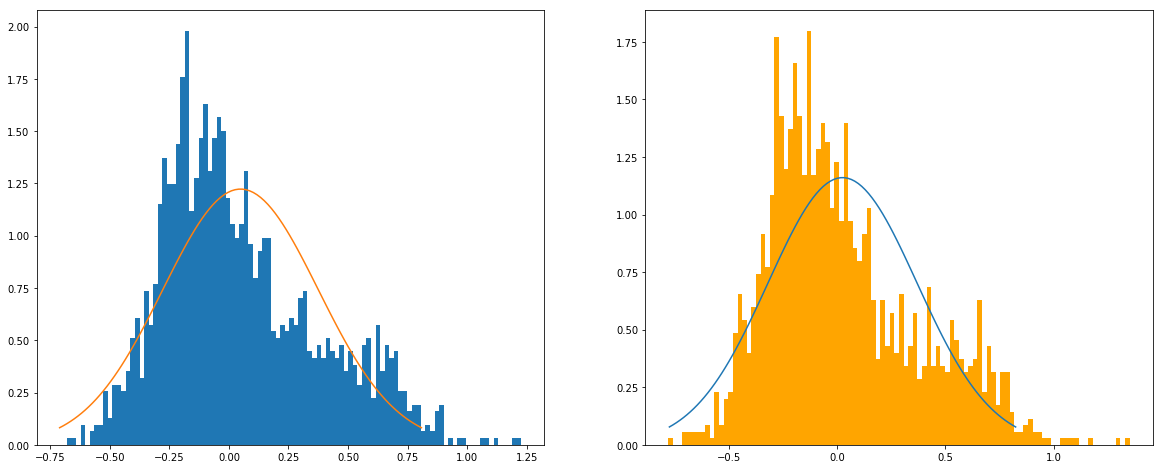

In [13]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df['GCAG'], bins=100, density=True)
plt.plot(x_gcag,y_gcag)

plt.subplot(1,2, 2 )
plt.hist(pivot_df['GISTEMP'], bins=100, density=True, color='orange')
plt.plot(x_gistemp,y_gistemp)

plt.show()

Wie unschwer zu erkennen ist, passt die Verteilung nicht genau auf die Daten und ist somit keine besonders gute Beschreibung der Daten.

** AUFGABE: ** Finde eine bessere Möglichkeit die Daten zu beschreiben

---

# Eine Möglichkeit

Wie wir oben an dem Zeitlichen Verlauf erkennen, ist bis irgendwann zwischen 1930 und 1960 bewegt sich die Durchschnittstemperatur um die 0 Grad. Nach diesem Zeitpunkt fängt die Temperatur an zu steigen. Dies wollen wir ausnutzen und die Daten der Zeit nach in zwei Bereiche aufteilen. Beide Bereiche wollen wir dann wieder mittels der Normalverteilung beschreiben.   

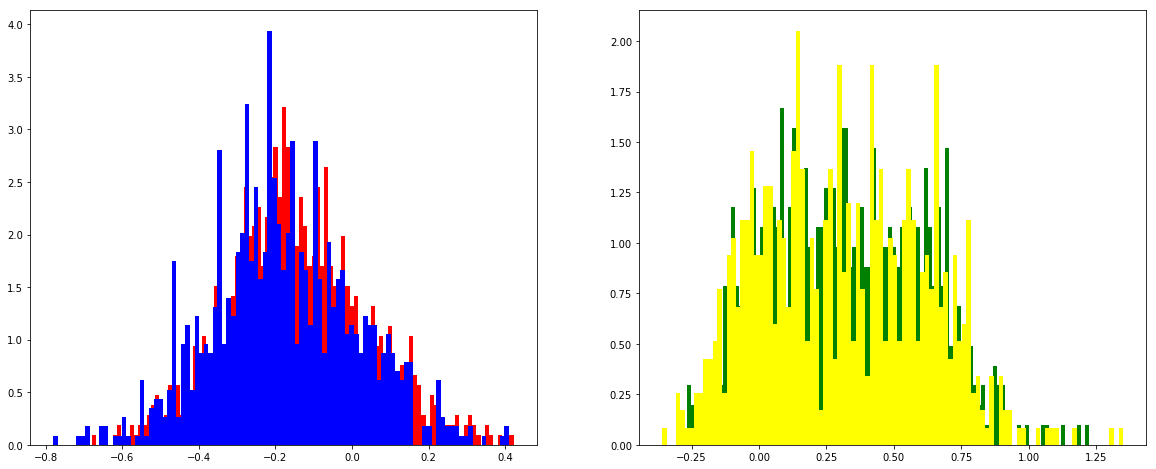

In [14]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df[pivot_df.index < '1960-01-01']['GCAG'], bins=100, density=True, color='red')
plt.hist(pivot_df[pivot_df.index < '1960-01-01']['GISTEMP'], bins=100, density=True, color='blue')

plt.subplot(1,2, 2 )
plt.hist(pivot_df[pivot_df.index >= '1960-01-01']['GCAG'], bins=100, density=True, color='green')
plt.hist(pivot_df[pivot_df.index >= '1960-01-01']['GISTEMP'], bins=100, density=True, color='yellow')

plt.show()

In [15]:
date_desc_pre = pivot_df[pivot_df.index < '1960-01-01'].describe()
print(date_desc_pre)

Source        GCAG     GISTEMP
count   960.000000  960.000000
mean     -0.145797   -0.180010
std       0.181490    0.187776
min      -0.679600   -0.780000
25%      -0.265175   -0.300000
50%      -0.162750   -0.190000
75%      -0.031975   -0.060000
max       0.424100    0.410000


In [16]:
date_desc_post = pivot_df[pivot_df.index >= '1960-01-01'].describe()
print(date_desc_post)

Source        GCAG     GISTEMP
count   684.000000  684.000000
mean      0.321912    0.311243
std       0.286076    0.305854
min      -0.266500   -0.360000
25%       0.082775    0.060000
50%       0.307600    0.300000
75%       0.549300    0.550000
max       1.224500    1.350000


### GCAG

In [17]:
loc_pre = date_desc_pre['GCAG']['mean']
scale_pre = date_desc_pre['GCAG']['std']

lower = scipy.stats.norm.ppf(0.01,loc_pre,scale_pre)
upper = scipy.stats.norm.ppf(0.99,loc_pre,scale_pre)
x_pre = scipy.linspace(lower,upper,100)

y_pre = scipy.stats.norm.pdf(x_pre,loc_pre,scale_pre)

In [18]:
loc_post = date_desc_post['GCAG']['mean']
scale_post = date_desc_post['GCAG']['std']

lower = scipy.stats.norm.ppf(0.01,loc_post,scale_post)
upper = scipy.stats.norm.ppf(0.99,loc_post,scale_post)
x_post = scipy.linspace(lower,upper,100)

y_post = scipy.stats.norm.pdf(x_post,loc_post,scale_post)

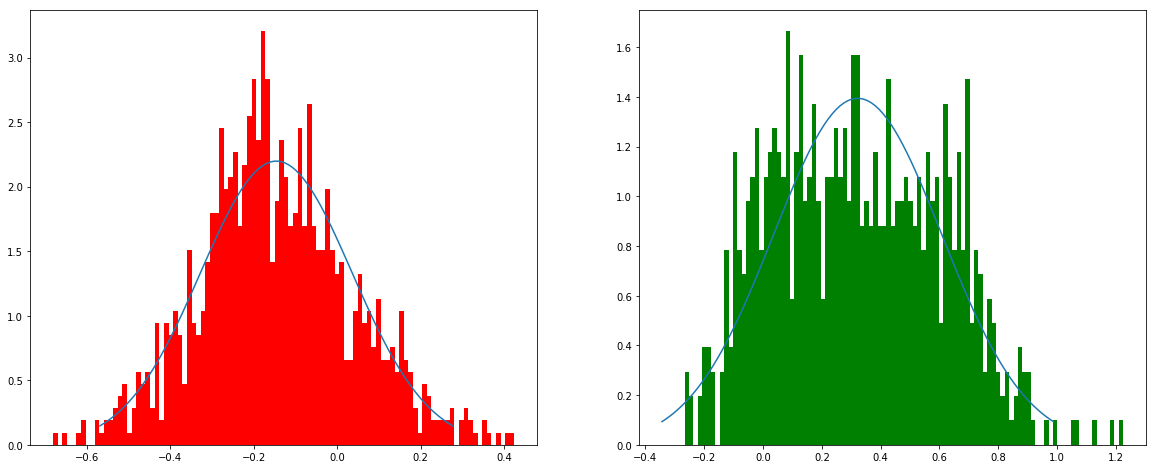

In [19]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df[pivot_df.index < '1960-01-01']['GCAG'], bins=100, density=True, color='red')
plt.plot(x_pre,y_pre)

plt.subplot(1,2, 2 )
plt.hist(pivot_df[pivot_df.index >= '1960-01-01']['GCAG'], bins=100, density=True, color='green')
plt.plot(x_post,y_post)

plt.show()

### GISTEMP

In [20]:
loc_pre = date_desc_pre['GISTEMP']['mean']
scale_pre = date_desc_pre['GISTEMP']['std']

lower = scipy.stats.norm.ppf(0.01,loc_pre,scale_pre)
upper = scipy.stats.norm.ppf(0.99,loc_pre,scale_pre)
x_pre = scipy.linspace(lower,upper,100)

y_pre = scipy.stats.norm.pdf(x_pre,loc_pre,scale_pre)

In [21]:
loc_post = date_desc_post['GISTEMP']['mean']
scale_post = date_desc_post['GISTEMP']['std']

lower = scipy.stats.norm.ppf(0.01,loc_post,scale_post)
upper = scipy.stats.norm.ppf(0.99,loc_post,scale_post)
x_post = scipy.linspace(lower,upper,100)

y_post = scipy.stats.norm.pdf(x_post,loc_post,scale_post)

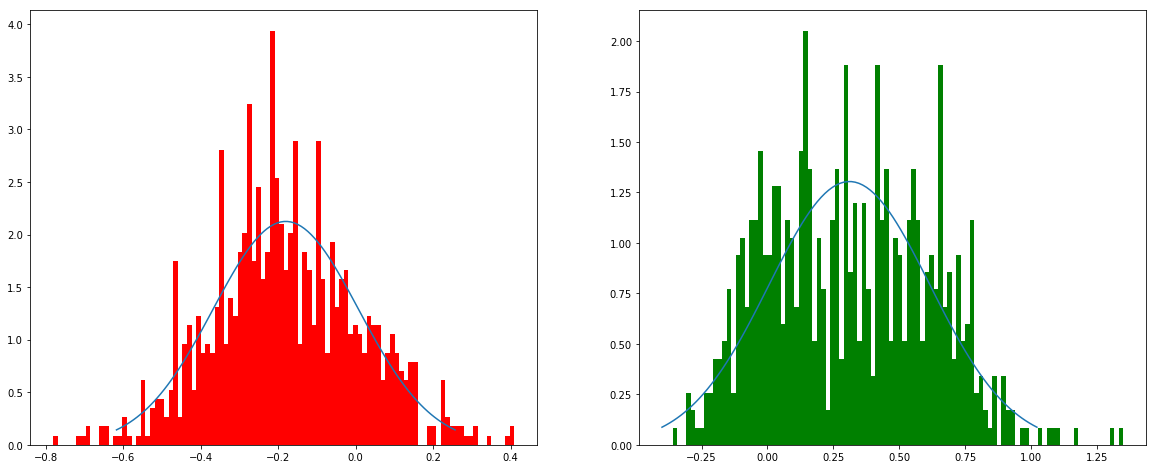

In [22]:
plt.figure(1, figsize=(20, 8))

plt.subplot(1,2, 1 )
plt.hist(pivot_df[pivot_df.index < '1960-01-01']['GISTEMP'], bins=100, density=True, color='red')
plt.plot(x_pre,y_pre)

plt.subplot(1,2, 2 )
plt.hist(pivot_df[pivot_df.index >= '1960-01-01']['GISTEMP'], bins=100, density=True, color='green')
plt.plot(x_post,y_post)

plt.show()

In [23]:
loc_post = date_desc_post['GISTEMP']['mean']
scale_post = date_desc_post['GISTEMP']['std']

lower = scipy.stats.norm.ppf(0.01,loc_pre,scale_pre)
upper = scipy.stats.norm.ppf(0.99,loc_post,scale_post)
x_comp = scipy.linspace(lower,upper,200)



sum_pre = pivot_df[pivot_df.index < '1960-01-01']['GISTEMP'].sum()
sum_post = pivot_df[pivot_df.index >= '1960-01-01']['GISTEMP'].sum()

alpha = 200/(np.abs(sum_pre) + np.abs(sum_post))

y_1 = scipy.stats.norm.pdf(x_comp,loc_pre,scale_pre) 
y_2 = scipy.stats.norm.pdf(x_comp,loc_post,scale_post)

y_comp = alpha * (y_1 + y_2)

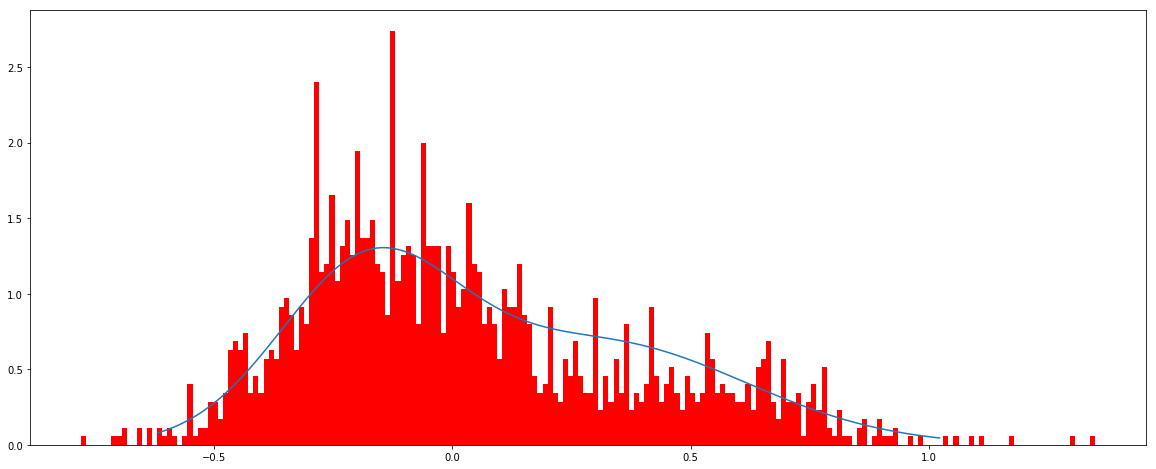

In [24]:
plt.figure(1, figsize=(20, 8))

plt.hist(pivot_df['GISTEMP'], bins=200, density=True, color='red')
plt.plot(x_comp, y_comp)

plt.show()

---

** Durch die Aufteilung der Daten in zwei Teilbereiche konnten wir bereits eine viel genauere Beschreibung der Daten durch die Normalverteilung finden! **

## Berechnung der Summe der Fehlerquadrate

0.0008046290239571841

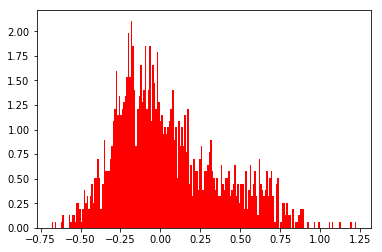

In [25]:
hist_data = plt.hist(pivot_df['GCAG'], bins=200, density=True, color='red')

hist_scaled = hist_data[0] / hist_data[0].sum()

calc_1 = scipy.stats.norm.pdf(hist_data[1],loc_pre,scale_pre) 
calc_2 = scipy.stats.norm.pdf(hist_data[1],loc_post,scale_post)

calc_comb = calc_1 + calc_2
calc_comb = calc_comb/calc_comb.sum()

hist_scaled.size

calc_comb.size

((calc_comb[0:200] - hist_scaled)*(calc_comb[0:200] - hist_scaled)).sum()